In [89]:
#importing required packages

In [138]:
import csv
import json
import pandas as pd
import numpy as np
import string
import demoji
import emoji
demoji.download_codes()
import re
import nltk
nltk.download('sentiwordnet')
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt

... OK (Got response in 0.13 seconds)
Writing emoji data to C:\Users\Krithika Ganesh\.demoji\codes.json ...
... OK


[nltk_data] Downloading package sentiwordnet to C:\Users\Krithika
[nltk_data]     Ganesh\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Krithika
[nltk_data]     Ganesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [139]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
from nltk import TweetTokenizer
from nltk import pos_tag,pos_tag_sents

[nltk_data] Downloading package punkt to C:\Users\Krithika
[nltk_data]     Ganesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [140]:
# Reading data into dataframe 
data_read=pd.read_csv('C:\\Users\\Krithika Ganesh\\Downloads\\train.csv')
data_test=pd.read_csv('C:\\Users\\Krithika Ganesh\\Downloads\\test.csv')

In [141]:
data_read.head()

,Tweets,Polarity
0,please him me <eos> why would you want to forg...,2
1,i am not your brother <eos> yh it was me then ...,2
2,u give dhoka and i do not want to give u again...,3
3,hmm <eos> good <eos> whats goin on,0
4,i was thinking <eos> you probably missed out o...,0


In [142]:
data_read['Tweets']

0        please him me <eos> why would you want to forg...
1        i am not your brother <eos> yh it was me then ...
2        u give dhoka and i do not want to give u again...
3                       hmm <eos> good <eos> whats goin on
4        i was thinking <eos> you probably missed out o...
5        but i love someone else <eos> honesty . that i...
6        i have no idea <eos> neither do i <eos> my eng...
7          ok <eos> i am just kidding xd <eos> hehe i know
8        do not be like this . you are my life😭😭😭😭😭😭😭😭😭...
9        enlighten me <eos> i do not like you <eos> wha...
10       okay , this was nice <eos> you made your last ...
11       why <eos> lol just because <eos> what is natio...
12       ok 😎 fine <eos> ok <eos> further assistance pl...
13       chai is the best thing one can take at evening...
14       no increment in position & salary <eos> so , y...
15       because it is about you <eos> so ? <eos> woww ...
16       why are u irritated ? <eos> you do not want to.

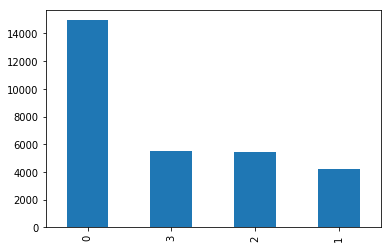

In [143]:
data_read['Polarity'].value_counts().plot(kind='bar')

In [144]:
# Creating a dictionary containing short words and its correspoding english words
contractionsDictionary = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I would",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"thx": "thanks",
"thxs": "thanks",
"r":"are",
"u":"you",
"ur":"your",
"haha":"happy",
"ya":"yes",
"thanx":"thanks",
"plz":"please",
"pls":"please",
"k":"ok"
}

# Preprocessing the text

In [145]:
#Creating preprocessing function to remove punctuationsl, html tags, numbers from tweets and converting text to lower case
def preprocess(text):
    text=str(text)
    text=text.lower()
    text=text.replace('{html}',"")
    cleanr= re.compile('<.*?>')
    cleantext=re.sub(cleanr, '', text)
    rem_url=re.sub(r'http\S+','',cleantext)
    clean_data= re.sub('[0-9]+','',rem_url)
    clean_data= re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",clean_data)
    return clean_data

In [146]:
#Applying preprocess function to training data
data_read['clean_Text']=data_read['Tweets'].apply(lambda s:preprocess(s))

In [147]:
data_read.head()

,Tweets,Polarity,clean_Text
0,please him me <eos> why would you want to forg...,2,please him me why would you want to forget ...
1,i am not your brother <eos> yh it was me then ...,2,i am not your brother yh it was me then
2,u give dhoka and i do not want to give u again...,3,u give dhoka and i do not want to give u again...
3,hmm <eos> good <eos> whats goin on,0,hmm good whats goin on
4,i was thinking <eos> you probably missed out o...,0,i was thinking you probably missed out on som...


In [148]:
#Applying preprocess function to test data 
data_test['clean_Text']=data_test['Tweets'].apply(lambda s:preprocess(s))

In [149]:
data_test.head()

,Tweets,Polarity,clean_Text
0,hmm <eos> what does your bio mean ? <eos> i do...,0,hmm what does your bio mean i dont have any...
1,what you like <eos> very little things <eos> ok,0,what you like very little things ok
2,yes <eos> how so ? <eos> i want to fuck babu,0,yes how so i want to fuck babu
3,what did you guess <eos> what what <eos> fuck,0,what did you guess what what fuck
4,we ? <eos> of course we will ! <eos> what gend...,0,we of course we will what gender movies yo...


In [150]:
# Function to tokenize words after preprocessing
def shortToFullText(shorttext):
    ProcessedString=shorttext.copy()
    for txt in ProcessedString:
        if txt in contractionsDictionary.keys():
            loc=ProcessedString.index(txt)
            ProcessedString[loc]=contractionsDictionary[txt]
        continue
    return ProcessedString

In [151]:
#Tokenizing words after preprocessing
def tokenize(text):
    tokenizer=TweetTokenizer()
    t_token=tokenizer.tokenize(text)
    return t_token

In [152]:
data_read['Tokenized']=data_read['clean_Text'].apply(lambda s:tokenize(s))

In [153]:
data_read.iloc[:,2:]

,clean_Text,Tokenized
0,please him me why would you want to forget ...,"[please, him, me, why, would, you, want, to, f..."
1,i am not your brother yh it was me then,"[i, am, not, your, brother, yh, it, was, me, t..."
2,u give dhoka and i do not want to give u again...,"[u, give, dhoka, and, i, do, not, want, to, gi..."
3,hmm good whats goin on,"[hmm, good, whats, goin, on]"
4,i was thinking you probably missed out on som...,"[i, was, thinking, you, probably, missed, out,..."
5,but i love someone else honesty that is all ...,"[but, i, love, someone, else, honesty, that, i..."
6,i have no idea neither do i my english is ve...,"[i, have, no, idea, neither, do, i, my, englis..."
7,ok i am just kidding xd hehe i know,"[ok, i, am, just, kidding, xd, hehe, i, know]"
8,do not be like this you are my life come hom...,"[do, not, be, like, this, you, are, my, life, ..."
9,enlighten me i do not like you whatt,"[enlighten, me, i, do, not, like, you, whatt]"


In [154]:
data_test['Tokenized']= data_test['clean_Text'].apply(lambda s: tokenize(s))

In [155]:
data_test.iloc[:,2:]

,clean_Text,Tokenized
0,hmm what does your bio mean i dont have any...,"[hmm, what, does, your, bio, mean, i, dont, ha..."
1,what you like very little things ok,"[what, you, like, very, little, things, ok]"
2,yes how so i want to fuck babu,"[yes, how, so, i, want, to, fuck, babu]"
3,what did you guess what what fuck,"[what, did, you, guess, what, what, fuck]"
4,we of course we will what gender movies yo...,"[we, of, course, we, will, what, gender, movie..."
5,where are you now at home just about to have...,"[where, are, you, now, at, home, just, about, ..."
6,that was a joke btw it was yes,"[that, was, a, joke, btw, it, was, yes]"
7,who d hell s he johnny depp duh who she,"[who, d, hell, s, he, johnny, depp, duh, who, ..."
8,yes good advice best advice i great thx,"[yes, good, advice, best, advice, i, great, thx]"
9,nice to meet u hi nice to meet you too,"[nice, to, meet, u, hi, nice, to, meet, you, too]"


In [108]:
data_read

,Tweets,Polarity,clean_Text,Tokenized
0,please him me <eos> why would you want to forg...,2,please him me why would you want to forget ...,"[please, him, me, why, would, you, want, to, f..."
1,i am not your brother <eos> yh it was me then ...,2,i am not your brother yh it was me then,"[i, am, not, your, brother, yh, it, was, me, t..."
2,u give dhoka and i do not want to give u again...,3,u give dhoka and i do not want to give u again...,"[u, give, dhoka, and, i, do, not, want, to, gi..."
3,hmm <eos> good <eos> whats goin on,0,hmm good whats goin on,"[hmm, good, whats, goin, on]"
4,i was thinking <eos> you probably missed out o...,0,i was thinking you probably missed out on som...,"[i, was, thinking, you, probably, missed, out,..."
5,but i love someone else <eos> honesty . that i...,2,but i love someone else honesty that is all ...,"[but, i, love, someone, else, honesty, that, i..."
6,i have no idea <eos> neither do i <eos> my eng...,0,i have no idea neither do i my english is ve...,"[i, have, no, idea, neither, do, i, my, englis..."
7,ok <eos> i am just kidding xd <eos> hehe i know,1,ok i am just kidding xd hehe i know,"[ok, i, am, just, kidding, xd, hehe, i, know]"
8,do not be like this . you are my life😭😭😭😭😭😭😭😭😭...,2,do not be like this you are my life come hom...,"[do, not, be, like, this, you, are, my, life, ..."
9,enlighten me <eos> i do not like you <eos> wha...,0,enlighten me i do not like you whatt,"[enlighten, me, i, do, not, like, you, whatt]"


In [156]:
# Creating list of HappyEmoticons
emoticons_happy = [
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3','(:'
    ]

In [157]:
# Creating list of sademoticons
emoticons_sad = [
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ]

In [158]:
# Converting emoji_symbols to text
def emoji_to_text(txts):
    emoji_list=txts.copy()
    for i in emoji_list:
        for j in emoticons_happy:
            re.sub(' +', ' ', i).strip()
            if j == i:
                loc = emoji_list.index(i)
                emoji_list[loc]=":Happy_emoji:"
        continue
        for k in emoticons_sad:
            if k == i:
                location = emoji_list.index(i)
                emoji_list[location]=":Sad_emoji:"
        continue
    return emoji_list

In [159]:
data_read['emoji_conversion']=data_read['Tokenized'].apply(lambda s:emoji_to_text(s))

In [160]:
data_read

,Tweets,Polarity,clean_Text,Tokenized,emoji_conversion
0,please him me <eos> why would you want to forg...,2,please him me why would you want to forget ...,"[please, him, me, why, would, you, want, to, f...","[please, him, me, why, would, you, want, to, f..."
1,i am not your brother <eos> yh it was me then ...,2,i am not your brother yh it was me then,"[i, am, not, your, brother, yh, it, was, me, t...","[i, am, not, your, brother, yh, it, was, me, t..."
2,u give dhoka and i do not want to give u again...,3,u give dhoka and i do not want to give u again...,"[u, give, dhoka, and, i, do, not, want, to, gi...","[u, give, dhoka, and, i, do, not, want, to, gi..."
3,hmm <eos> good <eos> whats goin on,0,hmm good whats goin on,"[hmm, good, whats, goin, on]","[hmm, good, whats, goin, on]"
4,i was thinking <eos> you probably missed out o...,0,i was thinking you probably missed out on som...,"[i, was, thinking, you, probably, missed, out,...","[i, was, thinking, you, probably, missed, out,..."
5,but i love someone else <eos> honesty . that i...,2,but i love someone else honesty that is all ...,"[but, i, love, someone, else, honesty, that, i...","[but, i, love, someone, else, honesty, that, i..."
6,i have no idea <eos> neither do i <eos> my eng...,0,i have no idea neither do i my english is ve...,"[i, have, no, idea, neither, do, i, my, englis...","[i, have, no, idea, neither, do, i, my, englis..."
7,ok <eos> i am just kidding xd <eos> hehe i know,1,ok i am just kidding xd hehe i know,"[ok, i, am, just, kidding, xd, hehe, i, know]","[ok, i, am, just, kidding, xd, hehe, i, know]"
8,do not be like this . you are my life😭😭😭😭😭😭😭😭😭...,2,do not be like this you are my life come hom...,"[do, not, be, like, this, you, are, my, life, ...","[do, not, be, like, this, you, are, my, life, ..."
9,enlighten me <eos> i do not like you <eos> wha...,0,enlighten me i do not like you whatt,"[enlighten, me, i, do, not, like, you, whatt]","[enlighten, me, i, do, not, like, you, whatt]"


In [161]:
data_test['emoji_conversion']=data_test['Tokenized'].apply(lambda s:emoji_to_text(s))

In [162]:
#Converting emoticons to text
def emoticons_to_Text(words):
    convertedlist=words.copy()
    for txt in convertedlist:
        str=emoji.demojize(txt)
        loc = convertedlist.index(txt)
        convertedlist[loc]=str
    return convertedlist

In [163]:
#Applying emoticon function
data_read['emoji_list']=data_read['emoji_conversion'].apply(lambda s:emoticons_to_Text(s))

In [164]:
data_read.iloc[8:45,4:6]

,emoji_conversion,emoji_list
8,"[do, not, be, like, this, you, are, my, life, ...","[do, not, be, like, this, you, are, my, life, ..."
9,"[enlighten, me, i, do, not, like, you, whatt]","[enlighten, me, i, do, not, like, you, whatt]"
10,"[okay, this, was, nice, you, made, your, last,...","[okay, this, was, nice, you, made, your, last,..."
11,"[why, lol, just, because, what, is, national, ...","[why, lol, just, because, what, is, national, ..."
12,"[ok, fine, ok, further, assistance, please]","[ok, fine, ok, further, assistance, please]"
13,"[chai, is, the, best, thing, one, can, take, a...","[chai, is, the, best, thing, one, can, take, a..."
14,"[no, increment, in, position, salary, so, you,...","[no, increment, in, position, salary, so, you,..."
15,"[because, it, is, about, you, so, woww, you, r...","[because, it, is, about, you, so, woww, you, r..."
16,"[why, are, u, irritated, you, do, not, want, t...","[why, are, u, irritated, you, do, not, want, t..."
17,"[yeeeah, what, is, it, yeaah, yes]","[yeeeah, what, is, it, yeaah, yes]"


In [165]:
data_test['emoji_list']=data_test['emoji_conversion'].apply(lambda s:emoticons_to_Text(s))

In [166]:
data_test.iloc[8:45,4:6]

,emoji_conversion,emoji_list
8,"[yes, good, advice, best, advice, i, great, thx]","[yes, good, advice, best, advice, i, great, thx]"
9,"[nice, to, meet, u, hi, nice, to, meet, you, too]","[nice, to, meet, u, hi, nice, to, meet, you, too]"
10,"[yupp, why, do, not, know, i, am, tired]","[yupp, why, do, not, know, i, am, tired]"
11,"[software, software, what, i, plan, on, going,...","[software, software, what, i, plan, on, going,..."
12,"[very, nice, thanks, r, u, know, tamil]","[very, nice, thanks, r, u, know, tamil]"
13,"[first, you, hurt, me, okay, so, i, talked, rude]","[first, you, hurt, me, okay, so, i, talked, rude]"
14,"[love, you, you, do, not, recognize, me, i, lo...","[love, you, you, do, not, recognize, me, i, lo..."
15,"[in, india, fogg, is, going, on, mumbaiindians...","[in, india, fogg, is, going, on, mumbaiindians..."
16,"[is, my, grammar, perfect, or, should, i, need...","[is, my, grammar, perfect, or, should, i, need..."
17,"[by, in, suits, have, good, day]","[by, in, suits, have, good, day]"


In [167]:
#denoising
def denoising_characters(words):
    denoise=words.copy()
    spec_chars=[":","?","<",">",".","/","*","#","!","\,","\\","|","\'","\"","[","]","{","}","(",")","+","-","_","&","^","$","%","~","`","@",","," ?"," !"]
    for word in list(spec_chars):
        re.sub(' +', ' ', word).strip()
        re.sub(r'\s([?.!"](?:\s|$))', r'\1', word)
        if ((word in denoise) and (len(word)==1)):
            denoise.remove(word)
    #denoise = [word for word in denoise if word.isalpha()]
    return denoise

In [168]:
#Applying denoising function
data_read['post_denoise']=data_read['emoji_list'].apply(lambda s:denoising_characters(s))

In [169]:
data_read.iloc[8:45,5:7]

,emoji_list,post_denoise
8,"[do, not, be, like, this, you, are, my, life, ...","[do, not, be, like, this, you, are, my, life, ..."
9,"[enlighten, me, i, do, not, like, you, whatt]","[enlighten, me, i, do, not, like, you, whatt]"
10,"[okay, this, was, nice, you, made, your, last,...","[okay, this, was, nice, you, made, your, last,..."
11,"[why, lol, just, because, what, is, national, ...","[why, lol, just, because, what, is, national, ..."
12,"[ok, fine, ok, further, assistance, please]","[ok, fine, ok, further, assistance, please]"
13,"[chai, is, the, best, thing, one, can, take, a...","[chai, is, the, best, thing, one, can, take, a..."
14,"[no, increment, in, position, salary, so, you,...","[no, increment, in, position, salary, so, you,..."
15,"[because, it, is, about, you, so, woww, you, r...","[because, it, is, about, you, so, woww, you, r..."
16,"[why, are, u, irritated, you, do, not, want, t...","[why, are, u, irritated, you, do, not, want, t..."
17,"[yeeeah, what, is, it, yeaah, yes]","[yeeeah, what, is, it, yeaah, yes]"


In [170]:
data_test['post_denoise']=data_test['emoji_list'].apply(lambda s:denoising_characters(s))

In [171]:
data_test

,Tweets,Polarity,clean_Text,Tokenized,emoji_conversion,emoji_list,post_denoise
0,hmm <eos> what does your bio mean ? <eos> i do...,0,hmm what does your bio mean i dont have any...,"[hmm, what, does, your, bio, mean, i, dont, ha...","[hmm, what, does, your, bio, mean, i, dont, ha...","[hmm, what, does, your, bio, mean, i, dont, ha...","[hmm, what, does, your, bio, mean, i, dont, ha..."
1,what you like <eos> very little things <eos> ok,0,what you like very little things ok,"[what, you, like, very, little, things, ok]","[what, you, like, very, little, things, ok]","[what, you, like, very, little, things, ok]","[what, you, like, very, little, things, ok]"
2,yes <eos> how so ? <eos> i want to fuck babu,0,yes how so i want to fuck babu,"[yes, how, so, i, want, to, fuck, babu]","[yes, how, so, i, want, to, fuck, babu]","[yes, how, so, i, want, to, fuck, babu]","[yes, how, so, i, want, to, fuck, babu]"
3,what did you guess <eos> what what <eos> fuck,0,what did you guess what what fuck,"[what, did, you, guess, what, what, fuck]","[what, did, you, guess, what, what, fuck]","[what, did, you, guess, what, what, fuck]","[what, did, you, guess, what, what, fuck]"
4,we ? <eos> of course we will ! <eos> what gend...,0,we of course we will what gender movies yo...,"[we, of, course, we, will, what, gender, movie...","[we, of, course, we, will, what, gender, movie...","[we, of, course, we, will, what, gender, movie...","[we, of, course, we, will, what, gender, movie..."
5,where are you now ? <eos> at home just about t...,0,where are you now at home just about to have...,"[where, are, you, now, at, home, just, about, ...","[where, are, you, now, at, home, just, about, ...","[where, are, you, now, at, home, just, about, ...","[where, are, you, now, at, home, just, about, ..."
6,that was a joke btw . <eos> it was <eos> yes 😁,1,that was a joke btw it was yes,"[that, was, a, joke, btw, it, was, yes]","[that, was, a, joke, btw, it, was, yes]","[that, was, a, joke, btw, it, was, yes]","[that, was, a, joke, btw, it, was, yes]"
7,who d hell s he <eos> johnny depp . duh ? <eos...,0,who d hell s he johnny depp duh who she,"[who, d, hell, s, he, johnny, depp, duh, who, ...","[who, d, hell, s, he, johnny, depp, duh, who, ...","[who, d, hell, s, he, johnny, depp, duh, who, ...","[who, d, hell, s, he, johnny, depp, duh, who, ..."
8,"yes , good advice <eos> best advice . <eos> i ...",0,yes good advice best advice i great thx,"[yes, good, advice, best, advice, i, great, thx]","[yes, good, advice, best, advice, i, great, thx]","[yes, good, advice, best, advice, i, great, thx]","[yes, good, advice, best, advice, i, great, thx]"
9,"nice to meet u <eos> hi , nice to meet you too...",1,nice to meet u hi nice to meet you too,"[nice, to, meet, u, hi, nice, to, meet, you, too]","[nice, to, meet, u, hi, nice, to, meet, you, too]","[nice, to, meet, u, hi, nice, to, meet, you, too]","[nice, to, meet, u, hi, nice, to, meet, you, too]"


In [172]:
#Tagging POS
def posTaggerFunction(texts):
    posConversionList=[]
    for word in texts:
        posConversionList.append(nltk.tag.pos_tag(word_tokenize(word)))
    return posConversionList

In [173]:
#Removing stop words
def stop_words(txts):
    to_be_list=txts.copy()
    stop_words=['those', 'they', 'further', 'most', 'or', 'whom', "you'd", 'until', 'shan', 'few', 'in', 'more', 
                'again', 'against', 'myself', "haven't", 'at', 'where', 'how', 'than', 's', 'are', 'before', 'll', 
                'wouldn', 'and', 'won', 'your', 'both', 'what', 'an', 'you', 'any', 'd', 'being', 'the', 'out', 'should', 
                'o', 'own',  "you're", 'had', 'my', 'this', 'to', 'ours', 'then', 'him', 'it', 'off', 'each', 'ain', 'into',  
                'does', 'because', 'above', 'as', 'ma', 'once', 'having', 'which', 'below', 'by', 'up', 'over','hmm', 
                'were', "that'll", 'can', 'here', "you've", 'themselves', "mightn't", 'such', 'me', 'through', "should've", 
                'did', 'on', 'needn', 'their', 'itself', 'am', "hadn't", 'of', 'have', 'we', 'theirs', "hasn't", 'only', 'he', 
                'm', 're', 'i', 'who', "she's", 'just', 'ourselves', "you'll", 'mightn', 'her', 'been', 'aren', 'with',  
                'herself', 'y', 'hers', 'do', 'weren', 'yourself', 'so', 've', 'his', 'these', 'mustn', 'a', 'about', 
                'all', 'yourselves', 'under', 'there', 'same', 'them', 'now', 'will', 'our', 'that',  'some', 'doing', 
                'but', 'himself', 'when', 'is', 'why', 'for',  'its', 'has',  'other',  "it's", 'yours', 'be', 'was', 
                'during',  'between', 'she', 'while', 'from', 'if','ur','gf' 'after','!','@','#','"','$','(','.',')',
                'u','r','i']
    for txt in list(to_be_list):
        txt.strip()
        if txt in stop_words:
            to_be_list.remove(txt)
    return to_be_list

In [175]:
# Applying shortext to full text function
data_read['post_shorttext']=data_read['post_denoise'].apply(lambda s:shortToFullText(s))
data_test['post_shorttext']=data_test['post_denoise'].apply(lambda s:shortToFullText(s))

In [176]:
data_read.iloc[8:45,6:8]

,post_denoise,post_shorttext
8,"[do, not, be, like, this, you, are, my, life, ...","[do, not, be, like, this, you, are, my, life, ..."
9,"[enlighten, me, i, do, not, like, you, whatt]","[enlighten, me, i, do, not, like, you, whatt]"
10,"[okay, this, was, nice, you, made, your, last,...","[okay, this, was, nice, you, made, your, last,..."
11,"[why, lol, just, because, what, is, national, ...","[why, lol, just, because, what, is, national, ..."
12,"[ok, fine, ok, further, assistance, please]","[ok, fine, ok, further, assistance, please]"
13,"[chai, is, the, best, thing, one, can, take, a...","[chai, is, the, best, thing, one, can, take, a..."
14,"[no, increment, in, position, salary, so, you,...","[no, increment, in, position, salary, so, you,..."
15,"[because, it, is, about, you, so, woww, you, r...","[because, it, is, about, you, so, woww, you, a..."
16,"[why, are, u, irritated, you, do, not, want, t...","[why, are, you, irritated, you, do, not, want,..."
17,"[yeeeah, what, is, it, yeaah, yes]","[yeeeah, what, is, it, yeaah, yes]"


In [177]:
#Applying stopwords function
data_read['post_Stop']=data_read['post_shorttext'].apply(lambda s:stop_words(s))
data_test['post_Stop']=data_test['post_shorttext'].apply(lambda s:stop_words(s))

In [178]:
data_read.iloc[8:45,6:9]

,post_denoise,post_shorttext,post_Stop
8,"[do, not, be, like, this, you, are, my, life, ...","[do, not, be, like, this, you, are, my, life, ...","[not, like, life, come, home, sleepppp, last, ..."
9,"[enlighten, me, i, do, not, like, you, whatt]","[enlighten, me, i, do, not, like, you, whatt]","[enlighten, not, like, whatt]"
10,"[okay, this, was, nice, you, made, your, last,...","[okay, this, was, nice, you, made, your, last,...","[okay, nice, made, last, comment, funny, xd, h..."
11,"[why, lol, just, because, what, is, national, ...","[why, lol, just, because, what, is, national, ...","[lol, national, birds, india]"
12,"[ok, fine, ok, further, assistance, please]","[ok, fine, ok, further, assistance, please]","[ok, fine, ok, assistance, please]"
13,"[chai, is, the, best, thing, one, can, take, a...","[chai, is, the, best, thing, one, can, take, a...","[chai, best, thing, one, take, evening, samosa..."
14,"[no, increment, in, position, salary, so, you,...","[no, increment, in, position, salary, so, you,...","[no, increment, position, salary, want, increm..."
15,"[because, it, is, about, you, so, woww, you, r...","[because, it, is, about, you, so, woww, you, a...","[woww, great]"
16,"[why, are, u, irritated, you, do, not, want, t...","[why, are, you, irritated, you, do, not, want,...","[irritated, not, want, knowthen, come, irritat..."
17,"[yeeeah, what, is, it, yeaah, yes]","[yeeeah, what, is, it, yeaah, yes]","[yeeeah, yeaah, yes]"


In [179]:
#Removing emoticons seperately
def emojisepearation(sentence):
    to_be_extracted=sentence.copy()
    for text in to_be_extracted:
        #to_be_extracted=(re.match(r':a-zA-Z:'),text)
        filtered = filter(re.match(r':\w+:'), text) 
    if filtered!=0:
        return filtered
    else: 
        return None

In [180]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Krithika Ganesh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [181]:
#Applying posTagger function
data_read['post_posConversion']=data_read['post_Stop'].apply(lambda s:posTaggerFunction(s))

In [182]:
data_read['post_posConversion']

0        [[(please, NN)], [(would, MD)], [(want, NN)], ...
1               [[(not, RB)], [(brother, NN)], [(yh, NN)]]
2        [[(give, VB)], [(dhoka, NN)], [(not, RB)], [(w...
3             [[(good, JJ)], [(whats, NNS)], [(goin, NN)]]
4        [[(thinking, VBG)], [(probably, RB)], [(missed...
5        [[(love, NN)], [(someone, NN)], [(else, RB)], ...
6        [[(no, DT)], [(idea, NN)], [(neither, DT)], [(...
7        [[(ok, NN)], [(kidding, VBG)], [(xd, NN)], [(h...
8        [[(not, RB)], [(like, IN)], [(life, NN)], [(co...
9        [[(enlighten, VB)], [(not, RB)], [(like, IN)],...
10       [[(okay, NN)], [(nice, JJ)], [(made, VBN)], [(...
11       [[(lol, NN)], [(national, JJ)], [(birds, NNS)]...
12       [[(ok, NN)], [(fine, NN)], [(ok, NN)], [(assis...
13       [[(chai, NN)], [(best, JJS)], [(thing, NN)], [...
14       [[(no, DT)], [(increment, NN)], [(position, NN...
15                           [[(woww, NN)], [(great, JJ)]]
16       [[(irritated, JJ)], [(not, RB)], [(want, NN)],.

In [183]:
# function to count the occurence of words
#global word_frequency
word_frequency={}
def frequent_occuringWords(words):
    for element in words:
        if element in word_frequency:
            word_frequency[element] = word_frequency[element] + 1
        else:
            word_frequency[element] = 1

In [184]:
#Applying frequent_occuringWords function
data_read['post_Stop'].apply(lambda s:frequent_occuringWords(s))

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
30123    None
30124    None
30125    None
30126    None
30127    None
30128    None
30129    None
30130    None
30131    None
30132    None
30133    None
30134    None
30135    None
30136    None
30137    None
30138    None
30139    None
30140    None
30141    None
30142    None
30143    None
30144    None
30145    None
30146    None
30147    None
30148    None
30149    None
30150    None
30151    None
30152    None
Name: post_Stop, Length: 30153, dtype: object

In [185]:
#sorting the frequently occuring words
from collections import OrderedDict
frequent_words = sorted(word_frequency.items(), key=lambda kv: kv[1], reverse=True)
print(frequent_words)

[('not', 10091), ('no', 2925), ('yes', 2904), ('know', 2832), ('like', 2539), ('ok', 2308), ('good', 2280), ('happy', 1840), ('love', 1833), ('want', 1684), ('tell', 1539), ('one', 1302), ('too', 1236), ('talk', 1211), ('really', 1180), ('get', 1176), ('very', 1171), ('please', 1116), ('go', 1097), ('funny', 1072), ('yeah', 1057), ('hate', 1048), ('bad', 977), ('well', 944), ('think', 934), ('say', 920), ('sorry', 913), ('oh', 894), ('sad', 848), ('see', 826), ('time', 815), ('nothing', 781), ('stupid', 752), ('much', 750), ('thanks', 749), ('send', 736), ('thank', 684), ('okay', 683), ('going', 680), ('mean', 662), ('talking', 661), ('would', 660), ('nice', 635), ('cannot', 633), ('something', 622), ('im', 622), ('lol', 602), ('life', 593), ('need', 591), ('friend', 591), ('day', 590), ('p', 573), ('right', 567), ('cool', 563), ('give', 558), ('make', 550), ('fuck', 547), ('come', 546), ('never', 541), ('fine', 537), ('feel', 533), ('also', 528), ('angry', 520), ('ask', 515), ('said',

In [186]:
#Feature Exctraction extracting 500 frequently occuring words
result_list =[x[0] for x in frequent_words]
toplist=result_list[:500]
print(toplist)

['not', 'no', 'yes', 'know', 'like', 'ok', 'good', 'happy', 'love', 'want', 'tell', 'one', 'too', 'talk', 'really', 'get', 'very', 'please', 'go', 'funny', 'yeah', 'hate', 'bad', 'well', 'think', 'say', 'sorry', 'oh', 'sad', 'see', 'time', 'nothing', 'stupid', 'much', 'thanks', 'send', 'thank', 'okay', 'going', 'mean', 'talking', 'would', 'nice', 'cannot', 'something', 'im', 'lol', 'life', 'need', 'friend', 'day', 'p', 'right', 'cool', 'give', 'make', 'fuck', 'come', 'never', 'fine', 'feel', 'also', 'angry', 'ask', 'said', 'always', 'name', 'sure', 'lost', 'feeling', 'got', 'girl', 'call', 'today', 'rude', 'wow', 'movie', 'best', 'let', 'even', 'wanna', 'alone', 'great', 'people', 'bye', 'back', 'friends', 'us', 'better', 'sleep', 'welcome', 'anything', 'way', 'wrong', 'help', 'hey', 'girlfriend', 'understand', 'awesome', 'fun', 'work', 'thing', 'stop', 'still', 'someone', 'baby', 'try', 'take', 'meet', 'number', 'first', 'home', 'thats', 'hell', 'miss', 'answer', 'joke', 'means', 'rep

In [187]:
russel_complex_list=['alarmed','tense','afraid','angry','annoyed','distressed','frustrated','aroused','astonished','excited','delighted','happy','pleased','glad','serene','content','atease','satisfied','relaxed','calm','miserable','sad','gloomy','depressed','bored','droopy','tired']

In [188]:
#Extracted Knowledge Base
seedlist=list(toplist) 
seedlist.extend(element for element in russel_complex_list if element not in seedlist) 
print(seedlist)

['not', 'no', 'yes', 'know', 'like', 'ok', 'good', 'happy', 'love', 'want', 'tell', 'one', 'too', 'talk', 'really', 'get', 'very', 'please', 'go', 'funny', 'yeah', 'hate', 'bad', 'well', 'think', 'say', 'sorry', 'oh', 'sad', 'see', 'time', 'nothing', 'stupid', 'much', 'thanks', 'send', 'thank', 'okay', 'going', 'mean', 'talking', 'would', 'nice', 'cannot', 'something', 'im', 'lol', 'life', 'need', 'friend', 'day', 'p', 'right', 'cool', 'give', 'make', 'fuck', 'come', 'never', 'fine', 'feel', 'also', 'angry', 'ask', 'said', 'always', 'name', 'sure', 'lost', 'feeling', 'got', 'girl', 'call', 'today', 'rude', 'wow', 'movie', 'best', 'let', 'even', 'wanna', 'alone', 'great', 'people', 'bye', 'back', 'friends', 'us', 'better', 'sleep', 'welcome', 'anything', 'way', 'wrong', 'help', 'hey', 'girlfriend', 'understand', 'awesome', 'fun', 'work', 'thing', 'stop', 'still', 'someone', 'baby', 'try', 'take', 'meet', 'number', 'first', 'home', 'thats', 'hell', 'miss', 'answer', 'joke', 'means', 'rep

In [189]:
def tag_conversion(to_be_convertedtag):
    if to_be_convertedtag.startswith('J'):
        return wn.ADJ
    elif to_be_convertedtag.startswith('N'):
        return wn.NOUN
    elif to_be_convertedtag.startswith('R'):
        return wn.ADV
    elif to_be_convertedtag.startswith('V'):
        return wn.VERB
    return None

In [190]:
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
seedlist_Classification={}
def word_classification(frequent_list):
    for word in frequent_list:
        words = word_tokenize(word)
        tags = pos_tag(words)
        wn_tag = tag_conversion(tags[0][1])
        word = tags[0][0]
        lemmatizer = WordNetLemmatizer()
        lemma = lemmatizer.lemmatize(word)
        if not lemma:
            continue
        synsets = wn.synsets(lemma, pos=wn_tag)
      #  print(synsets)
        if not synsets:
            continue
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        positive_score= float(swn_synset.pos_score())
        negative_score= float(swn_synset.neg_score())
        if(positive_score > negative_score):
            if(positive_score >= 0.5 and positive_score < 1 ):
                seedlist_Classification[word]="Happy-Active Class"
            elif(positive_score >= 0.1 and positive_score < 0.5 ):
                seedlist_Classification[word]="Happy-Inactive Class"
        elif (positive_score < negative_score):
            if(negative_score >= 0.5 and negative_score < 1 ):
                seedlist_Classification[word]="Unhappy-Active Class"
            elif(negative_score >= 0.1 and negative_score < 0.5 ):
                seedlist_Classification[word]="Unhappy-Inactive Class"
        elif (positive_score == negative_score):
            continue 
        

In [191]:
word_classification(seedlist)

In [192]:
print(seedlist_Classification)

{'not': 'Unhappy-Active Class', 'no': 'Unhappy-Inactive Class', 'yes': 'Happy-Inactive Class', 'like': 'Happy-Inactive Class', 'good': 'Happy-Active Class', 'happy': 'Happy-Active Class', 'love': 'Happy-Active Class', 'want': 'Unhappy-Inactive Class', 'too': 'Unhappy-Inactive Class', 'talk': 'Unhappy-Inactive Class', 'really': 'Happy-Active Class', 'get': 'Happy-Inactive Class', 'hate': 'Unhappy-Inactive Class', 'bad': 'Unhappy-Active Class', 'well': 'Happy-Inactive Class', 'stupid': 'Unhappy-Active Class', 'thanks': 'Happy-Inactive Class', 'nice': 'Happy-Active Class', 'friend': 'Happy-Inactive Class', 'cool': 'Unhappy-Inactive Class', 'give': 'Unhappy-Inactive Class', 'never': 'Unhappy-Active Class', 'fine': 'Unhappy-Inactive Class', 'feel': 'Happy-Inactive Class', 'lost': 'Unhappy-Active Class', 'feeling': 'Unhappy-Inactive Class', 'got': 'Happy-Inactive Class', 'today': 'Happy-Inactive Class', 'wow': 'Unhappy-Inactive Class', 'best': 'Happy-Active Class', 'even': 'Happy-Inactive Cl

In [193]:
#rule-based classification
def ruleBasedClassification(tagged_words):
    taglist=[]
    classified_class_count={}
    for txt in tagged_words:
        for word, tag in txt:
            tuplelist=[]            
            if word in seedlist_Classification.keys():
                classified_class=seedlist_Classification[word]
                if classified_class in classified_class_count:
                    classified_class_count[classified_class] = classified_class_count[classified_class] + 1
                else:
                    classified_class_count[classified_class] = 1
            continue
    if classified_class_count:
        MaxValue = max(classified_class_count.items(), key=lambda x: x[1]) 
        listclassification = list()
        # Iterate over all the items in dictionary to find keys with max value
        for key, value in classified_class_count.items():
            if value == MaxValue[1]:
                listclassification.append(key)
        if len(listclassification)==4:
            max_Classified="Happy-Active Class"  
        elif len(listclassification)==2 or len(listclassification)==3:
            res = [i for i in listclassification if "Unhappy" in i]
            if(len(res)>(len(listclassification)-len(res))):
                max_Classified="Unhappy-Active Class"               
            elif((len(listclassification)-len(res))>len(res)):
                max_Classified="Happy-Inactive Class"
            elif((len(listclassification)-len(res))==len(res)):
                max_Classified="Happy-Active Class"               
        else:
            max_Classified=listclassification
    else:
        max_Classified="neutral"
    return max_Classified

In [194]:
data_read['classified']=data_read['post_posConversion'].apply(lambda s:ruleBasedClassification(s))

In [195]:
data_read['classified']

0            Unhappy-Active Class
1          [Unhappy-Active Class]
2        [Unhappy-Inactive Class]
3            [Happy-Active Class]
4        [Unhappy-Inactive Class]
5            Unhappy-Active Class
6        [Unhappy-Inactive Class]
7        [Unhappy-Inactive Class]
8            Unhappy-Active Class
9              Happy-Active Class
10         [Unhappy-Active Class]
11                        neutral
12       [Unhappy-Inactive Class]
13           [Happy-Active Class]
14       [Unhappy-Inactive Class]
15                        neutral
16           Unhappy-Active Class
17         [Happy-Inactive Class]
18       [Unhappy-Inactive Class]
19                        neutral
20         [Happy-Inactive Class]
21       [Unhappy-Inactive Class]
22           [Happy-Active Class]
23           Unhappy-Active Class
24         [Happy-Inactive Class]
25                        neutral
26                        neutral
27         [Happy-Inactive Class]
28                        neutral
29            

In [196]:
X = data_read['Tweets']
y = data_read['Polarity']
test = data_test['Tweets']

In [197]:
train_tweets = data_read[['Polarity','Tweets']]
test = data_test['Tweets']

In [198]:
def text_processing(tweet):
    
    #Generating the list of words in the tweet (hastags and other punctuations removed)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    
    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    #Normalizing the words in tweets 
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from textblob import TextBlob
from nltk.corpus import stopwords
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['Tweets'], train_tweets['Polarity'], test_size=0.2)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Krithika
[nltk_data]     Ganesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [205]:
#Machine Learning Pipeline
#pipeline = Pipeline([
#    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
#    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#    ('classifier', MultinomialNB()),  
#])
#pipeline.fit(msg_train,label_train)

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])
pipeline.fit(msg_train,label_train)

C:\Users\Krithika Ganesh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [206]:
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))
print ('\n')
print("Overall Accuracy:")
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      3600
           1       0.55      0.77      0.64       615
           2       0.65      0.82      0.72       863
           3       0.73      0.85      0.79       953

   micro avg       0.78      0.78      0.78      6031
   macro avg       0.71      0.80      0.74      6031
weighted avg       0.81      0.78      0.78      6031



Overall Accuracy:
0.7779804344221523
